# Project: Wrangling and Analyze Data

- Jon Dean notes: Dog name, rating, stage (doggo, pupper, puppo, and floof(er)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [8]:
import pandas as pd

#downloaded csv from the website and store in project folder.
#read csv using pandas read_csv function

enhanced = pd.read_csv('twitter-archive-enhanced.csv')

#inspect file
enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests

#use the url and requests library to download the file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# Save tsv to file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [9]:
# Read in the tsv file
predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [3]:
#inspect the file and check it has downloaded
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

-   Notes from the course.   Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [24]:
import tweepy

# tweet_json.txt


consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)


In [25]:
# Test access with one tweet_id
tweet_id = '666020888022790149'
tweet1 = api.get_status(tweet_id, tweet_mode='extended')

# Save a tweet and see which fields to bring through
# Save into json file 'tweet_json.txt'
# Minimum requirements are 'tweet ID', 'retweet count', and 'favorite count'

#'id': 666020888022790149,
#'retweet_count': 427
#'favourites_count': 2315

id = tweet1.id
retweet = tweet1.retweet_count
favourite = tweet1._json['favorite_count']

In [50]:
import timeit
import json

#Create empty list to collate and put into dataframe
df_list = []

#In case tweets are deleted, try and except to catch the deleted tweets
tweet_errors = {}

#for statement to loop through tweets and extract id, retweet and favourite counts later on
with open('tweet_json.txt', 'w') as output:
    for tweets in enhanced.tweet_id:
        try:
            starttime = timeit.timeit()
            print(tweets)
            # Run api on each individual tweet to later extract necessary values
            tweet1 = api.get_status(tweets, tweet_mode='extended')
            tweet_json = tweet1._json
            json.dump(tweet_json,output)
            output.write('\n')
            endtime = timeit.timeit()
            print(endtime - starttime)
        except Exception as e:
            #print(str(tweets) + ": " + str(e))
            tweet_errors[str(tweets)] = str(e)

892420643555336193
-0.04994371799966757
892177421306343426
0.0035427319999143947
891815181378084864
0.009640662000492739
891689557279858688
-0.0461810439992405
891327558926688256
0.002757387000201561
891087950875897856
0.014670442000351613
890971913173991426
0.01880701299978682
890729181411237888
-0.02968817199962359
890609185150312448
-0.02506826400076534
890240255349198849
0.00952774000052159
890006608113172480
-0.013497206000465667
889880896479866881
0.010878525000407535
889665388333682689
0.0018896009996751673
889638837579907072
-0.0009999670000979677
889531135344209921
-0.002437913000903791
889278841981685760
-0.005575495999437408
888917238123831296
0.03653857299923402
888804989199671297
-0.013265098000374564
888554962724278272
0.00870037599997886
888202515573088257
888078434458587136
-0.0021596570004476234
887705289381826560
-0.0016826320006657625
887517139158093824
-0.0016864279996298137
887473957103951883
0.0007264420000865357
887343217045368832
0.007754038000712171
88710139280

Rate limit reached. Sleeping for: 604


-0.0014441079993048334
758740312047005698
-0.002189818999795534
758474966123810816
0.0158198099989022
758467244762497024
0.020844794998993166
758405701903519748
0.0021898429995417246
758355060040593408
-0.010410099999717204
758099635764359168
-0.007276341000761022
758041019896193024
-0.008312254999509605
757741869644341248
0.008050006999837933
757729163776290825
0.0044712490007441374
757725642876129280
-0.015999145000932913
757611664640446465
0.028306508998866775
757597904299253760
-0.00835175399970467
757596066325864448
-0.000274591000561486
757400162377592832
-0.0016928620007092832
757393109802180609
-0.002292250000209606
757354760399941633
0.01747679399977642
756998049151549440
-0.013043320999713615
756939218950160384
-0.000476660999993328
756651752796094464
-0.0016904340000110096
756526248105566208
0.018300893999366963
756303284449767430
-0.03151728800003184
756288534030475264
-0.0384207739998601
756275833623502848
0.0075889339996138006
755955933503782912
0.011407656999836036
75520

Rate limit reached. Sleeping for: 562


-0.02315404699947976
676957860086095872
0.001455588999306201
676949632774234114
-0.0030833939999865834
676948236477857792
-0.006722944001012365
676946864479084545
0.0038185909997991985
676942428000112642
-0.0027043390000471845
676936541936185344
-0.002493394000339322
676916996760600576
-0.0012316560005274368
676897532954456065
-0.0007399419991998002
676864501615042560
-0.004269540000677807
676821958043033607
0.00013887000204704236
676819651066732545
-0.000867699001901201
676811746707918848
-0.0003143560006719781
676776431406465024
0.0036671210000349674
676617503762681856
-0.0051775620013359
676613908052996102
-0.0013580010017903987
676606785097199616
0.0017712809985823696
676603393314578432
0.00809316199956811
676593408224403456
0.0020966230003978126
676590572941893632
0.006921115000295686
676588346097852417
-0.005777258998932666
676582956622721024
-0.004117303002203698
676575501977128964
-0.0005054939992987784
676533798876651520
-0.0011727130004146602
676496375194980353
-0.00064478100

In [51]:
#Check length of the tweet_errors file
len(tweet_errors)

29

- Previous error due to settings, fixed now but it was recording over 1,800 errors due to too many requests. Now 29 Unsuccessful.

- Now let's read this file into a pandas data frame so they are consistent with the other two tables (as json comparison will get messy)

In [10]:
# Create dataframe from reading in tweet_json.txt
import json

t1 = []
t2 = []

with open(r'tweet_json.txt') as t3:
    for t4 in t3:
        t1.append(json.loads(t4))


- inspect visually the json file and pick out the columns required.

In [11]:
t2 =[]

for t5 in t1:

    t2.append({
        'tweet_id': t5['id'],
        'retweets': int(t5['retweet_count']),
        'favourites': int(t5['favorite_count'])
    })

- above didn't work until I put int(), working now.

In [12]:
# create pandas dataframe
tweet_api_df = pd.DataFrame(t2, columns = ['tweet_id', 'retweets', 'favourites','ret'])

In [12]:
# Check output
tweet_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2327 non-null   int64  
 1   retweets    2327 non-null   int64  
 2   favourites  2327 non-null   int64  
 3   ret         0 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 72.8 KB


- Save fails into a df and csv as I may need these later on.

In [58]:
tweets_error_df = pd.DataFrame.from_dict(tweet_errors, orient="index")

In [59]:
tweets_error_df.to_csv("tweet_errors.csv")

In [60]:
tweets_error_df.value_counts()

404 Not Found\n144 - No status found with that ID.                        27
403 Forbidden\n179 - Sorry, you are not authorized to see this status.     1
404 Not Found\n34 - Sorry, that page does not exist.                       1
dtype: int64

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



- Steps for assessing data.
1.  Print the head of the data and visually assess the data
2.  Check the tidiness of the data, does each variable form a column, each observation form a row and each type of observational unit form a table?
3.  Check the value counts of fields to get a feel for what's in the key columns  
4.  Check the data types of the columns to ensure they're correct
5.  Anything else that stands out.

- Start by checking the enhanced table.

In [9]:
enhanced.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- Notes:
1. strange values in denominator and numerator, spot check these, check for blanks too.
2. doggo	floofer	pupper	puppo should be one column as it's not tidy
3. retweets need to be excluded, in_reply_to_status_id and retweeted_status_id shouldn't have a value in.
4. how accurate are the scores from the extraction?
5. Expanded urls are blank in some cases


In [7]:
enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- as suspected, the denominator has strange values, should all be 10.

In [6]:
enhanced.sort_values('rating_denominator')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
1576,687460506001633280,NaN,NaN,2016-01-14 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kramer. He's a Picasso Tortellini. Tie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687460506...,10,10,Kramer,None,None,None,None
1575,687476254459715584,NaN,NaN,2016-01-14 03:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's a fluffball. 11/10 would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687476254...,11,10,Curtis,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [75]:
enhanced[enhanced['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


- a few strange values at the extremes, nulls, 170 (I have checked, this is because there are 17 dogs). These should all be standardised to 10.
- 24/7 isn't a score, it's a time so this needs removing.

- now lets check the value_counts of some of the columns.

In [67]:
enhanced.value_counts('name')

name
None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Kramer        1
Cheesy        1
Chaz          1
Kulet         1
Kingsley      1
Length: 957, dtype: int64

- strange names None and a, they'll need tidying up.

In [92]:
enhanced.value_counts('expanded_urls')

expanded_urls
https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1    2
https://twitter.com/dog_rates/status/694669722378485760/photo/1,https://twitter.com/dog_rates/status/694669722378485760/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/791406955684368384/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1    2
https://twitter.com/dog_rates/status/680055455951884288/photo/1                                                                                                                                            

In [93]:
enhanced[enhanced['expanded_urls'] == 'https://twitter.com/dog_rates/status/694669722378485760/photo/1,https://twitter.com/dog_rates/status/694669722378485760/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None
1463,694669722378485760,NaN,NaN,2016-02-02 23:52:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's an important dog. Can contr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None


- some duplicates in there...

In [61]:
enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- timestamp saved as object, should be timestamp format.

In [62]:
predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- lots of pictures not showing dogs, will need to remove these.
- how do we use p1 p2 and p3 to determine if this picture is valid? Do we have any scenarios where it goes False, True, True? Yes - do we need a master p which checks for at least one True?

In [11]:
predictions.value_counts('p1')

p1
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hay                     1
hotdog                  1
hummingbird             1
ibex                    1
zebra                   1
Length: 378, dtype: int64

- zebra in there...

In [72]:
predictions.value_counts('p2')

p2
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
hyena                   1
iPod                    1
ice_lolly               1
indri                   1
wood_rabbit             1
Length: 405, dtype: int64

- icelolly...

In [73]:
predictions.value_counts('p3')

p3
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ibex                   1
jaguar                 1
jeep                   1
jersey                 1
zebra                  1
Length: 408, dtype: int64

In [69]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [587]:
tweet_api_df.head()

,tweet_id,retweets,favourites,ret
0,892420643555336193,7087,34173,NaN
1,892177421306343426,5344,29636,NaN
2,891815181378084864,3517,22314,NaN
3,891689557279858688,7288,37341,NaN
4,891327558926688256,7827,35680,NaN


In [588]:
tweet_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2327 non-null   int64  
 1   retweets    2327 non-null   int64  
 2   favourites  2327 non-null   int64  
 3   ret         0 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 72.8 KB


- columns in each dataframe

tweet_id, retweet_counts, favourite_counts
tweet_id, jpg_url, img_num,	p1,	p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog
tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo

### Quality issues
1. timestamp saved as object, should be timestamp format.

2. retweeted tweets need removing - in_reply_to_status_id should be null and so should retweeted_status_id

3. expanded_urls have nulls and duplicates - the duplicates seem to be due to the retweets.

4. rating_denominator values larger than 10 and less than 10 - multiple dogs in https://twitter.com/dog_rates/status/731156023742988288/photo/1 for example, they should be checked and standardised to 10. Also worth noting one of them is 24/7 which isn't a score. Go through each non 10 denominator and analyse, remove or rectify.

5. rating_numerator will need updating based on the changes to rating_denominator - the type will need to change to a float to account for decimals.

6. the name of the dog needs tidying (None and a need replacing). Text analysis on the text field to identify the name is required.

7. tweet errors from API need removing from the data.

8. predictions table shows animals aren't dogs so we need to remove these tweets from our data - if all are equal to false then exclude otherwise include.

### Tidiness issues
1. multiple columns for dog types, should split these into dog type and then the name rather than 4 columns

 Add a master column to determine whether there is a dog or not in the predictions table (same as 8 in above)

2. Join tweet_api_df to the enhanced table and the predictions table into the enhanced table to create one table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
enhanced_copy = enhanced.copy()
predictions_copy = predictions.copy()
tweet_api_copy = tweet_api_df.copy()

### Issue #1:
Timestamp saved as object, should be timestamp format.

#### Define:
Change the timestamp to the correct format.

#### Code

In [14]:
enhanced_copy.timestamp = pd.to_datetime(enhanced_copy.timestamp)

#### Test

In [477]:
enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

- The change has worked, we can move onto the next one.

### Issue #2:
Retweeted tweets need removing

#### Define
- in_reply_to_status_id should be null and so should retweeted_status_id

#### Code

In [15]:
enhanced_copy = enhanced_copy[enhanced_copy['in_reply_to_status_id'].isnull()]
enhanced_copy = enhanced_copy[enhanced_copy['retweeted_status_id'].isnull()]

#### Test

In [479]:
enhanced_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.097000e+03,0.0,0.0,0.0,0.0,2097.000000,2097.000000
mean,7.365594e+17,NaN,NaN,NaN,NaN,12.189318,10.448736
std,6.710178e+16,NaN,NaN,NaN,NaN,40.364996,6.645061
min,6.660209e+17,NaN,NaN,NaN,NaN,0.000000,2.000000
25%,6.768197e+17,NaN,NaN,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,NaN,NaN,NaN,NaN,11.000000,10.000000
75%,7.877176e+17,NaN,NaN,NaN,NaN,12.000000,10.000000
max,8.924206e+17,NaN,NaN,NaN,NaN,1776.000000,170.000000


- we can see there are 0 counts for in_reply_to_status_id and retweeted_status_id so the code has worked.

### Issue #3:
expanded_urls have nulls and duplicates

### Define:
 - remove any nulls and check for duplicates.

### Test:

In [16]:
enhanced_copy = enhanced_copy[enhanced_copy['expanded_urls'].notnull()]

In [481]:
enhanced_copy.value_counts('expanded_urls')

expanded_urls
https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                                           2
http://goo.gl/ArWZfi,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1    1
https://twitter.com/dog_rates/status/772114945936949249/photo/1                                                                                                                                                                                                                         1
https://twitter.com/dog_rates/status/771770456517009408/photo/1                                                                             

- https://vine.co/v/ea0OwvPTx9l is repeated.

In [482]:
enhanced_copy[enhanced_copy['expanded_urls'] == 'https://vine.co/v/ea0OwvPTx9l']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


- this one seems acceptable, let's check for nulls.

In [483]:
enhanced_copy[enhanced_copy['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- the code has worked.

### Issue #4:
rating_denominator values not equal to 10.

### Define:
- multiple dogs in https://twitter.com/dog_rates/status/731156023742988288/photo/1 for example, they should be checked and standardised to 10. 
- Also worth noting one of them is 24/7 which isn't a score. 
- Go through each non 10 denominator and analyse, remove or rectify, use code where possible and not manual changes.
- remove nulls.

### Test:

-first bring out all the non 10 denominator columns with their text description.

In [484]:
pd.set_option('display.max_colwidth', -1)
enhanced_copy[['tweet_id','text','rating_denominator','rating_numerator']][enhanced_copy.rating_denominator != 10]

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4008/1138584944.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,text,rating_denominator,rating_numerator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7,24
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150,165
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11,9
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170,204
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20,4
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90,99
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50,45


- we need to capture when there are multiple ##/## so we can decide which number to take
- we need to take /10 first
- we then need to look at scenarios where /10 isn't in the data and make a decision
- automate as much as possible and then create a list of tweets where we will have to manually delete, for example the 24/7 tweet doesn't have a score.
- after that we need to divide by the denominator to standardise so they're all /10 and keep update the rating_numerator.

In [17]:
#test = enhanced_copy[['tweet_id','text']][enhanced_copy.tweet_id == 740373189193256964].copy()
test = enhanced_copy[['tweet_id','text','rating_denominator','rating_numerator']].copy()

- use the re library to search for multiple scores and count them, add them back into the temporary dataframe

In [18]:
import re

test['issue_4'] = test['text'].apply(lambda x: len(re.findall("[0-9]+[\/][0-9]+",x)))

test[test.issue_4 != 1]



,tweet_id,text,rating_denominator,rating_numerator,issue_4
766,777684233540206592,"""Yep... just as I suspected. You're not flossi...",10,12,2
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is ti...,10,10,2
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",11,9,2
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,20,4,2
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50,2
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill ...,10,10,2
1359,703356393781329922,This is Socks. That water pup w the super legs...,10,9,2
1459,695064344191721472,This may be the greatest video I've ever been ...,10,4,2
1465,694352839993344000,Meet Oliviér. He takes killer selfies. Has a d...,10,10,2
1508,691483041324204033,When bae says they can't go out but you see th...,10,5,2


- we now have all the scores and it appears that there are duplicate scores per pet, sometimes a date. 
- if there are multiple dogs we will exclude from the sample.
- Given the volume of these and the pattern isn't consistent, it's important to highlight these scenarios and deal with them individually. 
- Any that cannot be resolved will be removed from the table. After this we'll look for any scores that don't have a /10 in and then clean those.

In [19]:
#picking cases where it is clearly picking the wrong number
test['rating_denominator'][test.tweet_id == 777684233540206592] = 10
test['rating_numerator'][test.tweet_id == 777684233540206592] = 11
test['issue_4'][test.tweet_id == 777684233540206592] = 1
test[test.tweet_id == 777684233540206592]

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/483568437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_denominator'][test.tweet_id == 777684233540206592] = 10
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/483568437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_numerator'][test.tweet_id == 777684233540206592] = 11
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/483568437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

,tweet_id,text,rating_denominator,rating_numerator,issue_4
766,777684233540206592,"""Yep... just as I suspected. You're not flossi...",10,11,1


In [20]:
#another scenario where it has picked the wrong number
test['rating_denominator'][test.tweet_id == 740373189193256964] = 10
test['rating_numerator'][test.tweet_id == 740373189193256964] = 14
test['issue_4'][test.tweet_id == 740373189193256964] = 1
test[test.tweet_id == 740373189193256964]

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1927636167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_denominator'][test.tweet_id == 740373189193256964] = 10
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1927636167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_numerator'][test.tweet_id == 740373189193256964] = 14
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1927636167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

,tweet_id,text,rating_denominator,rating_numerator,issue_4
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",10,14,1


In [21]:
#another scenario where it has picked the wrong number
test['rating_denominator'][test.tweet_id == 722974582966214656] = 10
test['rating_numerator'][test.tweet_id == 722974582966214656] = 13
test['issue_4'][test.tweet_id == 722974582966214656] = 1
test[test.tweet_id == 722974582966214656]

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1556533204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_denominator'][test.tweet_id == 722974582966214656] = 10
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1556533204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_numerator'][test.tweet_id == 722974582966214656] = 13
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1556533204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

,tweet_id,text,rating_denominator,rating_numerator,issue_4
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,10,13,1


In [22]:
#another scenario where it has picked the wrong number
test['rating_denominator'][test.tweet_id == 666287406224695296] = 10
test['rating_numerator'][test.tweet_id == 666287406224695296] = 9
test['issue_4'][test.tweet_id == 666287406224695296] = 1
test[test.tweet_id == 666287406224695296]
	

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1458503000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_denominator'][test.tweet_id == 666287406224695296] = 10
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1458503000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_numerator'][test.tweet_id == 666287406224695296] = 9
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1458503000.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

,tweet_id,text,rating_denominator,rating_numerator,issue_4
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,10,9,1


In [23]:
#this number looks ok, we can keep it, so reset it to 1.
test['issue_4'][test.tweet_id == 672248013293752320] = 1
test[test.tweet_id == 672248013293752320]


/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/4259058191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['issue_4'][test.tweet_id == 672248013293752320] = 1


,tweet_id,text,rating_denominator,rating_numerator,issue_4
2010,672248013293752320,10/10 for dog. 7/10 for cat. 12/10 for human. ...,10,10,1


In [24]:
#this number looks ok, we can keep it, so reset it to 1.
test['issue_4'][test.tweet_id == 695064344191721472] = 1
test[test.tweet_id == 695064344191721472]


/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1856000967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['issue_4'][test.tweet_id == 695064344191721472] = 1


,tweet_id,text,rating_denominator,rating_numerator,issue_4
1459,695064344191721472,This may be the greatest video I've ever been ...,10,4,1


In [25]:
#this number looks ok, we can keep it, so reset it to 1.
test['issue_4'][test.tweet_id == 673295268553605120] = 1
test[test.tweet_id == 673295268553605120]

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/4099014617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['issue_4'][test.tweet_id == 673295268553605120] = 1


,tweet_id,text,rating_denominator,rating_numerator,issue_4
1970,673295268553605120,Meet Eve. She's a raging alcoholic 8/10 (would...,10,8,1


In [26]:
#another scenario where it has picked the wrong number
test['rating_denominator'][test.tweet_id == 682962037429899265] = 10
test['rating_numerator'][test.tweet_id == 682962037429899265] = 10
test['issue_4'][test.tweet_id == 682962037429899265] = 1
test[test.tweet_id == 682962037429899265]

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/335481439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_denominator'][test.tweet_id == 682962037429899265] = 10
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/335481439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_numerator'][test.tweet_id == 682962037429899265] = 10
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/335481439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

,tweet_id,text,rating_denominator,rating_numerator,issue_4
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,10,10,1


In [27]:
#another scenario where it has picked the wrong number
test['rating_denominator'][test.tweet_id == 716439118184652801] = 10
test['rating_numerator'][test.tweet_id == 716439118184652801] = 11
test['issue_4'][test.tweet_id == 716439118184652801] = 1
test[test.tweet_id == 716439118184652801]

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/4037902309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_denominator'][test.tweet_id == 716439118184652801] = 10
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/4037902309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rating_numerator'][test.tweet_id == 716439118184652801] = 11
/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/4037902309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

,tweet_id,text,rating_denominator,rating_numerator,issue_4
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,10,11,1


- the remaining tweets look like they are multiple dogs.
- next remove these from the main table and update the new scores
- after that look at any scores with a deliminator != 10 and perform the same checks.

In [28]:
test = test.rename(columns = {'rating_denominator': 'rating_denominator_2', 'rating_numerator': 'rating_numerator_2'})

In [29]:
test_4 = test[test.issue_4 == 1]

In [499]:
test_4.head()

,tweet_id,text,rating_denominator_2,rating_numerator_2,issue_4
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,13,1
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,13,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,12,1
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10,13,1
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,12,1


In [30]:
enhanced_copy = pd.merge(enhanced_copy,test_4[['tweet_id','rating_denominator_2','rating_numerator_2','issue_4']],on=['tweet_id'], how='inner')

In [31]:
del enhanced_copy['rating_denominator']
del enhanced_copy['rating_numerator']

In [32]:
enhanced_copy = enhanced_copy.rename(columns = {'rating_denominator_2': 'rating_denominator', 'rating_numerator_2': 'rating_numerator'})

In [503]:
enhanced_copy[enhanced_copy.issue_4 != 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating_denominator,rating_numerator,issue_4


In [33]:
del enhanced_copy['issue_4']

In [34]:
test_5 = enhanced_copy[enhanced_copy.rating_denominator != 10]

In [506]:
test_5[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
338,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
402,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
698,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
901,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1007,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1032,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1052,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1125,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1205,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1389,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110


- all of these have multiple dogs, we are not including these in the sample. the 24/7 record isn't a score, we can remove all of these.

In [35]:
enhanced_copy = enhanced_copy[enhanced_copy.rating_denominator == 10]

In [509]:
enhanced_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating_denominator,rating_numerator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,10,13
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,10,13
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,10,12
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,10,13
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,10,12


### Issue #5:

rating_numerator will need updating based on the changes to rating_denominator - the type will need to change to a float to account for decimals.

### Define:
Divide the numerator by the denominator and multiply it by 10, change the denominator to 10.
Change the data type to a float as it may not be a whole number.

### Test:

- not required as captured in the two issues picked up in issue 4.

In [38]:
enhanced_copy.rating_numerator = enhanced_copy.rating_numerator.astype('float')

In [36]:
enhanced_copy['rating_numerator'] = enhanced_copy['rating_numerator']*10/enhanced_copy['rating_denominator']

In [37]:
enhanced_copy['rating_denominator'] = 10

In [513]:
enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2075
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2064 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2064 non-null   datetime64[ns, UTC]
 4   source                      2064 non-null   object             
 5   text                        2064 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2064 non-null   object             
 10  name                        2064 non-null   object          

### Issue #6:

The name of the dog needs tidying (None and a need replacing). Text analysis on the text field to identify the name is required.

### Define:
- analyse the text and see if there is a reason why the name is None or a
- put a function in to replace these values.

### Test:

In [39]:
name_test = enhanced_copy[['tweet_id','text','name']]

In [40]:
name_test[name_test['name'] == 'None']

,tweet_id,text,name
5,891087950875897856,Here we have a majestic great white breaching ...,None
7,890729181411237888,When you watch your owner call another dog a g...,None
12,889665388333682689,Here's a puppo that seems to be on the fence a...,None
23,887343217045368832,You may not have known you needed to see this ...,None
24,887101392804085760,This... is a Jubilant Antarctic House Bear. We...,None
...,...,...,...
2062,666082916733198337,Here we have a well-established sunblockerspan...,None
2063,666073100786774016,Let's hope this flight isn't Malaysian (lol). ...,None
2064,666071193221509120,Here we have a northern speckled Rhododendron....,None
2071,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,None


- search in here for "name" and "called"

In [41]:
test_9 = name_test[name_test['name'].isin({'None','a'})]

In [42]:
test_9['name_called'] = test_9['text'].apply(lambda x: len(re.findall("name",x)))

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/861074447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_9['name_called'] = test_9['text'].apply(lambda x: len(re.findall("name",x)))


In [43]:
test_9['called_name'] = test_9['text'].apply(lambda x: len(re.findall("called",x)))

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/3235345491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_9['called_name'] = test_9['text'].apply(lambda x: len(re.findall("called",x)))


In [44]:
test_9.value_counts('called_name')

called_name
0    638
1      1
dtype: int64

In [45]:
test_9.value_counts('name_called')

name_called
0    609
1     30
dtype: int64

In [46]:
test_9[test_9['called_name']>0]

,tweet_id,text,name,name_called,called_name
2026,666837028449972224,My goodness. Very rare dog here. Large. Tail d...,None,0,1


- this scenario is a false positive.

In [47]:
test_9[test_9['name_called']>0]

,tweet_id,text,name,name_called,called_name
32,885518971528720385,I have a new hero and his name is Howard. 14/1...,None,1,0
140,859607811541651456,Sorry for the lack of posts today. I came home...,None,1,0
1355,686286779679375361,When bae calls your name from across the room....,None,1,0
1431,682047327939461121,We normally don't rate bears but this one seem...,None,1,0
1486,679736210798047232,This pup's name is Sabertooth (parents must be...,None,1,0
1598,675706639471788032,This is a Sizzlin Menorah spaniel from Brookly...,a,1,0
1690,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip...,a,1,0
1769,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yac...,a,1,0
1798,671147085991960577,This is a Helvetica Listerine named Rufus. Thi...,a,1,0
1818,670803562457407488,I would do radical things in the name of Dog G...,None,1,0


- 'name is', 'named' tend to be pre-fixes of the data. Write a regex to pick these names out.

In [48]:
test_10 = test_9[test_9['name_called']>0]

In [49]:
test_10['name_2'] = test_10['text'].apply(lambda x: re.search(("name is |named "),x))

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1604866608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_10['name_2'] = test_10['text'].apply(lambda x: re.search(("name is |named "),x))


In [50]:
test_10['name_5'] = test_10.name_2.str.extract('((?:\d+))', expand=True)

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/3608729748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_10['name_5'] = test_10.name_2.str.extract('((?:\d+))', expand=True)


In [51]:
test_10['name_3'] = test_10.text.str.split(r"name is |named ", n=-1,expand=True)[1]

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/1398882213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_10['name_3'] = test_10.text.str.split(r"name is |named ", n=-1,expand=True)[1]


In [52]:
test_10['name_4'] = test_10.name_3.str.split(r"\ |\.", n=-1,expand=True)[0]

/var/folders/18/zxc9cp5x1_q4cbfdgvs3g6hc0000gn/T/ipykernel_4412/891975687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_10['name_4'] = test_10.name_3.str.split(r"\ |\.", n=-1,expand=True)[0]


In [528]:
test_10

,tweet_id,text,name,name_called,called_name,name_2,name_5,name_3,name_4
32,885518971528720385,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,None,1,0,"<re.Match object; span=(26, 34), match='name is '>",NaN,Howard. 14/10 https://t.co/gzLHboL7Sk,Howard
140,859607811541651456,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,None,1,0,"<re.Match object; span=(108, 116), match='name is '>",NaN,Zoey and she's 13/10 https://t.co/BArWupFAn0,Zoey
1355,686286779679375361,When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe,None,1,0,None,NaN,None,None
1431,682047327939461121,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,None,1,0,"<re.Match object; span=(58, 66), match='name is '>",NaN,Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,Thea
1486,679736210798047232,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,None,1,0,"<re.Match object; span=(11, 19), match='name is '>",NaN,Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,Sabertooth
1598,675706639471788032,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,a,1,0,"<re.Match object; span=(48, 54), match='named '>",NaN,Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,Wylie
1690,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,a,1,0,"<re.Match object; span=(37, 43), match='named '>",NaN,Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,Kip
1769,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,a,1,0,"<re.Match object; span=(30, 36), match='named '>",NaN,Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,Jacob
1798,671147085991960577,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,a,1,0,"<re.Match object; span=(30, 36), match='named '>",NaN,Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,Rufus
1818,670803562457407488,I would do radical things in the name of Dog God. I'd believe every word in that book. 10/10 https://t.co/9ZuGAmLZDR,None,1,0,None,NaN,None,None


- this has succesfully identified more names which we can now add back in to the table.

In [53]:
test_name = pd.merge(enhanced_copy,test_10[['tweet_id','name_4']],on=['tweet_id'], how='left')

In [54]:
test_name['name_test'] = test_name['name_4'].mask(pd.isnull, test_name['name'])

In [531]:
test_name

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating_denominator,rating_numerator,name_4,name_test
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,10,13.0,NaN,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,10,13.0,NaN,Tilly
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,10,12.0,NaN,Archie
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,10,13.0,NaN,Darla
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,10,12.0,NaN,Franklin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,None,None,None,None,None,10,5.0,NaN,None
2060,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,a,None,None,None,None,10,6.0,NaN,a
2061,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,a,None,None,None,None,10,9.0,NaN,a
2062,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,a,None,None,None,None,10,7.0,NaN,a


- this has worked, now tidy up the table and reassign it to enhanced_copy

In [55]:
enhanced_copy = test_name

In [56]:
del enhanced_copy['name']

In [57]:
del enhanced_copy['name_4']

In [58]:
enhanced_copy = enhanced_copy.rename(columns={'name_test': 'name'})

In [59]:
enhanced_copy.value_counts('name')

name
None       577
a           34
Charlie     11
Lucy        11
Cooper      10
          ... 
Kawhi        1
Kayla        1
Keet         1
Kellogg      1
Meyer        1
Length: 967, dtype: int64

In [60]:
enhanced_copy['name'] = enhanced_copy.name.replace('a', '')

In [61]:
enhanced_copy['name'] = enhanced_copy.name.replace('the', '')

In [62]:
enhanced_copy['name'] = enhanced_copy.name.replace('None', '')

In [63]:
enhanced_copy.value_counts('name')

name
             619
Charlie       11
Lucy          11
Oliver        10
Cooper        10
            ... 
Hubertson      1
Huck           1
Humphrey       1
Hurley         1
Lambeau        1
Length: 965, dtype: int64

In [540]:
enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2064 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2064 non-null   datetime64[ns, UTC]
 4   source                      2064 non-null   object             
 5   text                        2064 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2064 non-null   object             
 10  doggo                       2064 non-null   object          

### Issue #7:
Tweet errors from API need removing from the data.

### Define:
The tweet_errors.csv file contains tweets that could not be downloaded through the API. Remove these tweets from the enhanced_copy dataframe

### Test:

In [64]:
test_7 = pd.merge(enhanced_copy,predictions_copy,on=['tweet_id'], how='inner')

In [542]:
test_7

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1937,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1938,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1939,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/downl

### Issue #8:
Remove animals that aren't dogs from the predictions table.

### Define:
Concatenate the booleans to see if there is a dog in the picture.

### Test:

In [65]:
predictions_copy['p0_dog'] = predictions_copy['p1_dog'] + predictions_copy['p2_dog'] + predictions_copy['p3_dog']

In [66]:
predictions_copy = predictions_copy[predictions_copy['p0_dog'] == True]

In [67]:
predictions_copy.value_counts('p0_dog')

p0_dog
True    1751
dtype: int64

- after trying to analyse this data I realised that we need to have one column with the dog in there, so we need to take the first dog from the predictions table and add this as a column to the data frame. i.e. if p1 is false and p2 is true then take the p2.

In [64]:
predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p0_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True


- create a function to take the best guess of dog type, if the pn_dog = True. Effectively a coelesce function.

In [68]:
def dog_breed(a):
    if a['p1_dog'] == True:
        return a['p1']
    elif a['p2_dog'] == True:
        return a['p2']
    else:
        return a['p3']

In [71]:
predictions_copy['dog_breed'] = predictions_copy.apply(dog_breed, axis=1)

In [72]:
predictions_copy.value_counts('dog_breed')

dog_breed
golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Irish_wolfhound           1
standard_schnauzer        1
EntleBucher               1
Bouvier_des_Flandres      1
Scotch_terrier            1
Length: 113, dtype: int64

- the change has worked.

### Issue #9:
Multiple columns for dog types, should be merged into one column.

### Define:
Create one column instead of four, dog type.

### Test:

In [73]:
enhanced_copy.groupby(['doggo','floofer','pupper','puppo']).size().reset_index()

,doggo,floofer,pupper,puppo,0
0,None,None,None,None,1730
1,None,None,None,puppo,23
2,None,None,pupper,None,219
3,None,floofer,None,None,9
4,doggo,None,None,None,72
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


In [74]:
#Remove all Nones and create a column that concatenates the types
enhanced_copy.doggo = enhanced_copy.doggo.replace('None','')
enhanced_copy.floofer = enhanced_copy.floofer.replace('None','')
enhanced_copy.pupper = enhanced_copy.pupper.replace('None','')
enhanced_copy.puppo = enhanced_copy.puppo.replace('None','')

In [75]:
enhanced_copy.groupby(['doggo','floofer','pupper','puppo']).size().reset_index()

,doggo,floofer,pupper,puppo,0
0,,,,,1730
1,,,,puppo,23
2,,,pupper,,219
3,,floofer,,,9
4,doggo,,,,72
5,doggo,,,puppo,1
6,doggo,,pupper,,9
7,doggo,floofer,,,1


In [76]:
enhanced_copy['dog_stage'] = enhanced_copy.doggo + enhanced_copy.floofer + enhanced_copy.pupper + enhanced_copy.puppo

In [77]:
enhanced_copy.value_counts('dog_stage')

dog_stage
                1730
pupper           219
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
dtype: int64

In [78]:
# Now delete the old columns
del enhanced_copy['doggo']
del enhanced_copy['pupper']
del enhanced_copy['floofer']
del enhanced_copy['puppo']

In [79]:
enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2064 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2064 non-null   datetime64[ns, UTC]
 4   source                      2064 non-null   object             
 5   text                        2064 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2064 non-null   object             
 10  rating_denominator          2064 non-null   int64           

### Issue #10:
Create one dataset by merging the cleaned tables and drop unnecessary columns.

### Define:
- Join tweet_api_df to the enhanced table.
- join the predictions table into the enhanced table.
- remove unnecessary columns.

### Test:

In [80]:
enhanced_copy.count()

tweet_id                      2064
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                     2064
source                        2064
text                          2064
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2064
rating_denominator            2064
rating_numerator              2064
name                          2064
dog_stage                     2064
dtype: int64

In [81]:
predictions_copy.count()

tweet_id     1751
jpg_url      1751
img_num      1751
p1           1751
p1_conf      1751
p1_dog       1751
p2           1751
p2_conf      1751
p2_dog       1751
p3           1751
p3_conf      1751
p3_dog       1751
p0_dog       1751
dog_breed    1751
dtype: int64

In [82]:
tweet_api_copy.count()

tweet_id      2327
retweets      2327
favourites    2327
ret              0
dtype: int64

In [83]:
tweet_api_copy.groupby('tweet_id').size()

tweet_id
666020888022790149    1
666029285002620928    1
666033412701032449    1
666044226329800704    1
666049248165822465    1
                     ..
891327558926688256    1
891689557279858688    1
891815181378084864    1
892177421306343426    1
892420643555336193    1
Length: 2327, dtype: int64

In [84]:
master_df = pd.merge(enhanced_copy, tweet_api_copy, on=['tweet_id'], how='inner')

In [85]:
master_df = pd.merge(master_df, predictions_copy, on=['tweet_id'], how='inner')

In [86]:
del master_df['p1']
del master_df['p1_dog']
del master_df['p2']
del master_df['p2_dog']
del master_df['p3']
del master_df['p3_dog']

In [87]:
del master_df['p1_conf']
del master_df['p2_conf']
del master_df['p3_conf']

In [88]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_numerator,name,dog_stage,retweets,favourites,ret,jpg_url,img_num,p0_dog,dog_breed
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,13.0,Tilly,,5344,29636,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,True,Chihuahua
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,12.0,Archie,,3517,22314,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,True,Chihuahua
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,13.0,Darla,,7288,37341,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,True,Labrador_retriever
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,12.0,Franklin,,7827,35680,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,True,basset
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,13.0,,,2634,18008,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,True,Chesapeake_Bay_retriever


In [89]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1629 entries, 0 to 1628
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1629 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1629 non-null   datetime64[ns, UTC]
 4   source                      1629 non-null   object             
 5   text                        1629 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1629 non-null   object             
 10  rating_denominator          1629 non-null   int64           

In [90]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_numerator,name,dog_stage,retweets,favourites,ret,jpg_url,img_num,p0_dog,dog_breed
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,13.0,Tilly,,5344,29636,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,True,Chihuahua
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,12.0,Archie,,3517,22314,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,True,Chihuahua
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,13.0,Darla,,7288,37341,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,True,Labrador_retriever
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,12.0,Franklin,,7827,35680,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,True,basset
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,13.0,,,2634,18008,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,True,Chesapeake_Bay_retriever


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
master_df.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

- some of the key fields we've got to play with:
timestamp
rating_denominator          
rating_numerator           
name                       
dog_stage                
retweets          
favourites          
p1
p2
p3       

- potential insights
rating num/denom vs favourites
retweets vs favourites by dog type (p1)
names by dog type?
dog stages by retweets
dog stages by favourites
timestamp trend on likes/retweets?
top 5 ratings

- visuals
bar chart
pie chart
scatter plot
line graph
treemap
etc

- questions
- what are the best average ratings by dog stage/breed?
- what are the most popular dog breeds?
- what are the most popular dog stages?
- what dogs have the most retweets/favourites?
- what has changed over time?


In [92]:
# Read in the results as this is a new session
import pandas as pd

results = pd.read_csv('twitter_archive_master.csv')

In [93]:
results.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,rating_numerator,name,dog_stage,retweets,favourites,ret,jpg_url,img_num,p0_dog,dog_breed
0,0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,...,13.0,Tilly,NaN,5344,29636,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,True,Chihuahua
1,1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,12.0,Archie,NaN,3517,22314,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,True,Chihuahua
2,2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,...,13.0,Darla,NaN,7288,37341,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,True,Labrador_retriever
3,3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,...,12.0,Franklin,NaN,7827,35680,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,True,basset
4,4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,...,13.0,NaN,NaN,2634,18008,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,True,Chesapeake_Bay_retriever


In [98]:
results['dog_breed'].value_counts().head()

golden_retriever      154
Labrador_retriever     99
Pembroke               93
Chihuahua              88
pug                    62
Name: dog_breed, dtype: int64

In [99]:
results['dog_stage'].value_counts().head()

pupper         165
doggo           53
puppo           21
floofer          7
doggopupper      7
Name: dog_stage, dtype: int64

In [103]:
results[['dog_breed','dog_stage','rating_numerator','favourites']].sort_values('rating_numerator',ascending = False)

,dog_breed,dog_stage,rating_numerator,favourites
444,Pomeranian,NaN,75.0,17549
488,clumber,pupper,27.0,6265
1167,kuvasz,NaN,26.0,1592
222,bloodhound,NaN,14.0,26164
33,Pembroke,NaN,14.0,24127
...,...,...,...,...
489,Afghan_hound,NaN,3.0,6066
1500,pug,NaN,3.0,603
1204,Maltese_dog,NaN,2.0,5047
1546,miniature_pinscher,NaN,2.0,351


### Insights:
1. The top 5 most pictured dogs are 1. golden retrievers 2. labrador retriever 3.Pembroke 4. Chihuahua 5. Pug.

2. The most popular dog stages are 1. Pupper 2. Doggo 3. Puppo 4. Floofer and 5. More than one stage.

3. A Pomeranian dog scored highest with 75 whereas an American Staffordshire Terrier scored the lowest with 0. Interestingly the latter had more favourites than the former.

### Visualization

- what is the link between rating numerator (as standardised) and number of likes.

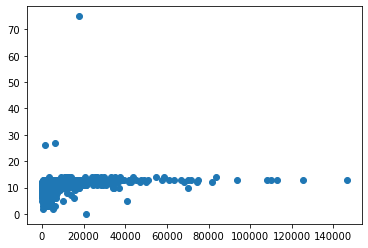

In [107]:
from matplotlib import pyplot

pyplot.scatter(results['favourites'],results['rating_numerator'])

- not much of a trend, r value will be low. How about separating by dog breed.

In [112]:
import numpy as np

r = np.corrcoef(results['favourites'],results['rating_numerator'])
r1 = r[0,1]
r2 = r1**2
r2

0.09100211267962668

- As expected the relationship between the number of favourites and rating shows no correlation.

- What about likes and retweets?

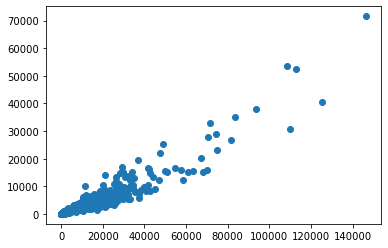

In [113]:
pyplot.scatter(results['favourites'],results['retweets'])

In [114]:
r = np.corrcoef(results['favourites'],results['retweets'])
r1 = r[0,1]
r2 = r1**2
r2

0.8649519648663594

- A much stronger relationship, people are more likely to like and retweet than like based on the score alone.